## Step 1: Setting Up the Environment and Loading Data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

path = "/content/drive/MyDrive/Portfolio /Colombia_Fred_Analysis/GDP_Quarterly_Timeline gdp.xlsx"
df = pd.read_excel('/content/drive/MyDrive/Portfolio /Colombia_Fred_Analysis/GDP_Quarterly_Timeline gdp.xlsx')

In [7]:
display(df.head())

,Quarter_Start_Date,GDP_USD,Property_Price_Index,CPI_Housing_Index,Avg_Quarterly_CPI,Avg_Quarterly_Bond_Yield,Avg_Quarterly_USD_COP_Rate,Total_Quarterly_Exports_USD
0,2009-01-01,232468660224,89.963303,67.180000,82.656222,9.966667,2411.880208,7942115072
1,2009-04-01,232468660224,92.607803,68.243942,83.417631,9.503333,2234.045898,7804488192
2,2009-07-01,232468660224,93.692200,68.796829,83.355087,9.700000,2016.412882,8219040000
3,2009-10-01,232468660224,95.090103,69.283623,83.183772,8.706666,1964.996623,8853111040
4,2010-01-01,286498521088,97.334900,70.011826,84.315005,9.436666,1947.586385,9606184960


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Quarter_Start_Date           60 non-null     datetime64[ns]
 1   GDP_USD                      60 non-null     int64         
 2   Property_Price_Index         60 non-null     float64       
 3   CPI_Housing_Index            59 non-null     float64       
 4   Avg_Quarterly_CPI            60 non-null     float64       
 5   Avg_Quarterly_Bond_Yield     60 non-null     float64       
 6   Avg_Quarterly_USD_COP_Rate   60 non-null     float64       
 7   Total_Quarterly_Exports_USD  60 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 3.9 KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 2: Visualizing Long-Term Economic Trends
Now, we'll plot each economic indicator over time. This is the most effective way to see the underlying trends, identify periods of high volatility, and spot potential structural breaks or turning points in the economy.

In [10]:
# Set a professional visual style for all subsequent plots.
sns.set_style("whitegrid")

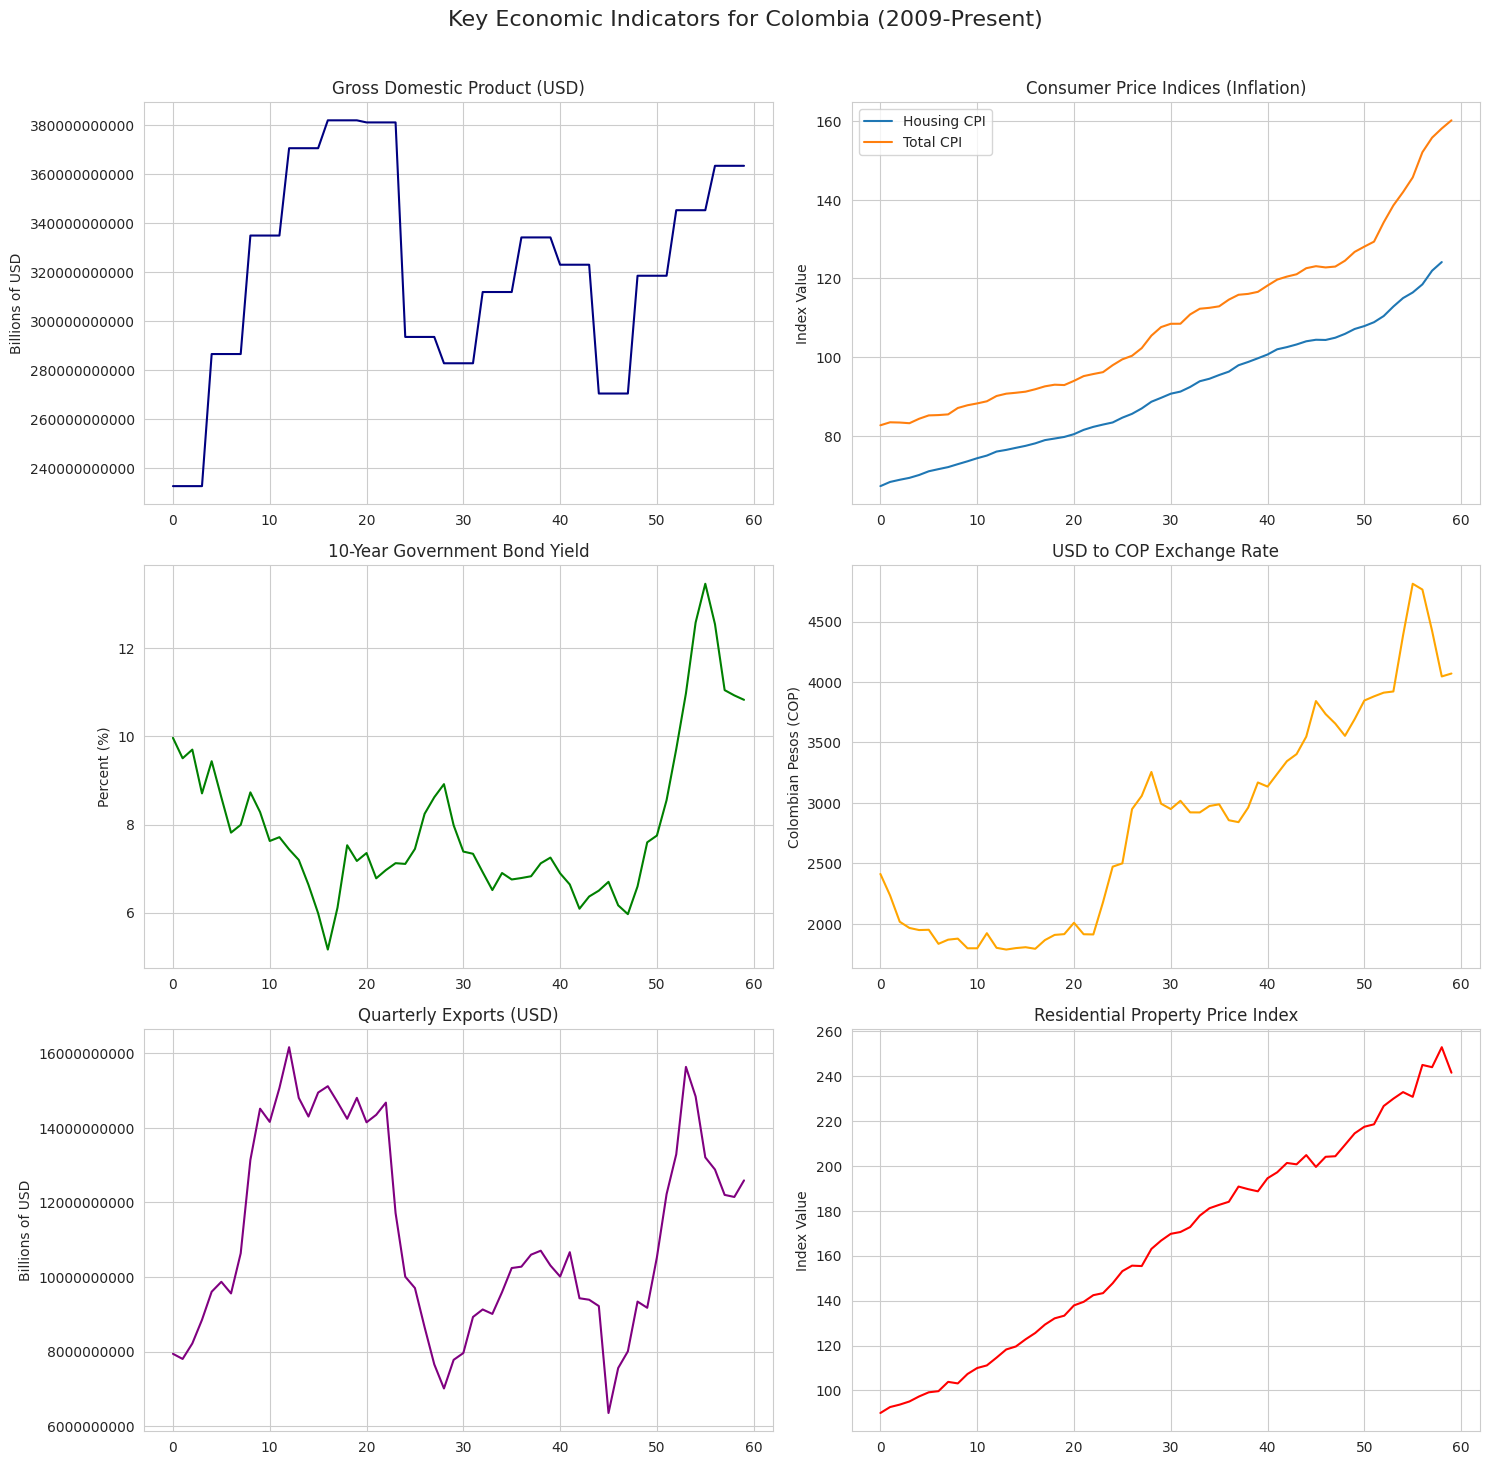

In [11]:
#
# STEP 2: PLOT TRENDS FOR EACH INDICATOR
#

# plt.subplots() creates a figure and a grid of subplots.
# nrows=4, ncols=2 means we're creating a 4x2 grid to hold our plots.
# figsize=(15, 20) sets the overall size of the figure in inches for better readability.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# fig.suptitle() adds a main title to the entire figure.
fig.suptitle("Key Economic Indicators for Colombia (2009-Present)", fontsize=16)

# The 'axes' object is a 2D array. axes.flatten() converts it to a 1D array,
# which makes it easier to loop through or assign plots to each subplot.
axes = axes.flatten()

# --- Create each individual plot ---

# Select the 'GDP_USD' column from the DataFrame and plot it on the first subplot (axes[0]).
df['GDP_USD'].plot(ax=axes[0], title='Gross Domestic Product (USD)', color='navy')
# Set the label for the y-axis on this subplot.
axes[0].set_ylabel('Billions of USD')
# This line prevents the y-axis labels from using scientific notation (e.g., 2.3e+11).
axes[0].ticklabel_format(style='plain', axis='y')


# Plot both CPI columns on the second subplot (axes[1]).
df[['CPI_Housing_Index', 'Avg_Quarterly_CPI']].plot(ax=axes[1], title='Consumer Price Indices (Inflation)')
# Add a legend to distinguish between the two lines.
axes[1].legend(['Housing CPI', 'Total CPI'])
axes[1].set_ylabel('Index Value')


# Plot the 10-Year Bond Yield on the third subplot (axes[2]).
df['Avg_Quarterly_Bond_Yield'].plot(ax=axes[2], title='10-Year Government Bond Yield', color='green')
axes[2].set_ylabel('Percent (%)')


# Plot the USD Exchange Rate on the fourth subplot (axes[3]).
df['Avg_Quarterly_USD_COP_Rate'].plot(ax=axes[3], title='USD to COP Exchange Rate', color='orange')
axes[3].set_ylabel('Colombian Pesos (COP)')


# Plot the Quarterly Exports on the fifth subplot (axes[4]).
df['Total_Quarterly_Exports_USD'].plot(ax=axes[4], title='Quarterly Exports (USD)', color='purple')
axes[4].set_ylabel('Billions of USD')
axes[4].ticklabel_format(style='plain', axis='y')


# Plot the Property Price Index on the sixth subplot (axes[5]).
df['Property_Price_Index'].plot(ax=axes[5], title='Residential Property Price Index', color='red')
axes[5].set_ylabel('Index Value')


# Since we have a 4x2 grid (8 subplots) but only 6 plots, we remove the unused ones.
fig.delaxes(axes[6])
fig.delaxes(axes[7])

# plt.tight_layout() automatically adjusts subplot params so that the subplots fit into the figure area.
# The 'rect' argument is adjusted to make space for the main suptitle.
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# plt.show() displays the final figure with all the plots.
plt.show()

## Step 3: Quantifying Relationships with a Correlation Matrix

Visual inspection is useful, but we need to statistically quantify the relationships between these variables. A correlation matrix calculates how strongly each variable is related to every other variable. We will visualize this matrix as a heatmap, which uses color to represent the strength and direction of the correlations.

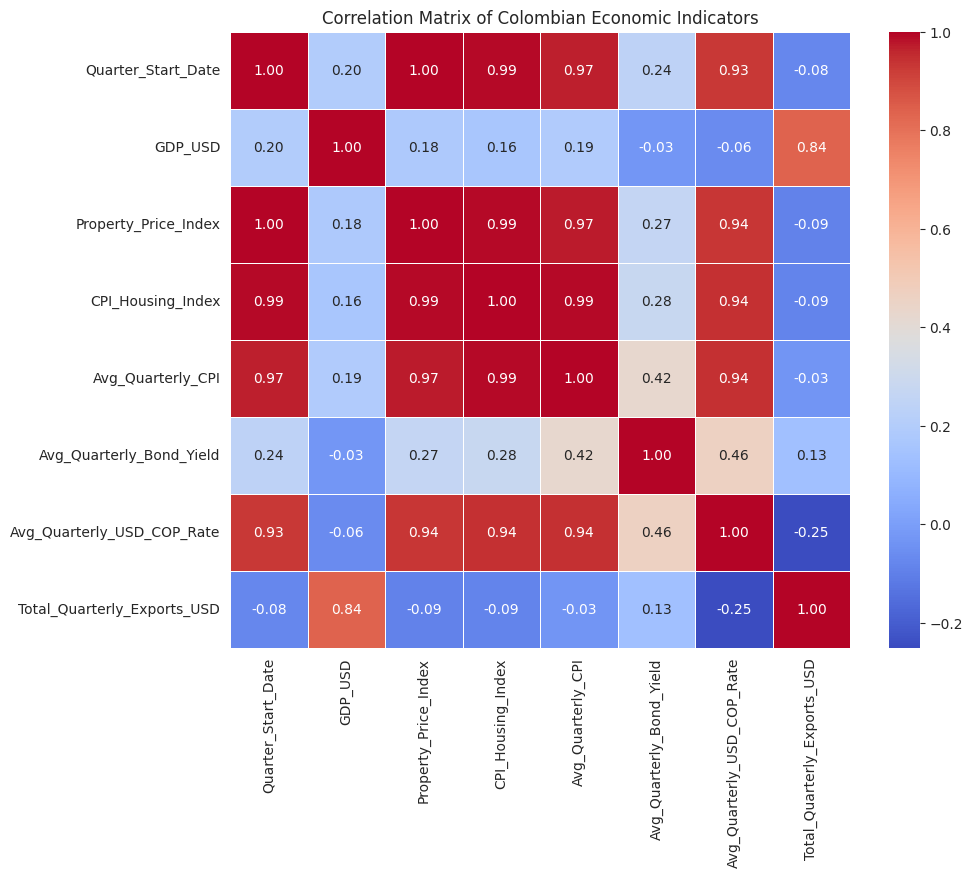

In [12]:
#
# STEP 3: CREATE A CORRELATION HEATMAP
#

# The .corr() method calculates the pairwise correlation of all columns in the DataFrame.
# The result is a new DataFrame where rows and columns are the variable names and the values are the correlation coefficients.
correlation_matrix = df.corr()

# plt.figure() creates a new figure.
# figsize=(10, 8) sets the size of this specific figure.
plt.figure(figsize=(10, 8))

# sns.heatmap() is the function that draws the heatmap.
# We pass our calculated correlation_matrix to it.
# annot=True: This is a crucial argument that writes the data value in each cell.
# cmap='coolwarm': This color map uses cool colors (blue) for negative correlations and warm colors (red) for positive ones.
# fmt='.2f': This formats the annotation numbers to two decimal places for clarity.
# linewidths=.5: This adds thin lines between the cells to make them distinct.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the heatmap.
plt.title('Correlation Matrix of Colombian Economic Indicators')

# Display the generated heatmap.
plt.show()

## Advanced Analysis: Regression and Causality
The goal here is to go beyond just observing trends and correlations. We want to measure the impact of different economic factors on GDP and test if one factor can predict another. We will use two powerful statistical methods for this

##Part 1: Regression Analysis - Measuring What Drives GDP
A regression model helps us measure the specific impact of a set of independent variables (like exports and interest rates) on a single dependent variable (GDP).

The Goal:
To answer the question: By how much does a change in exports, interest rates, or the exchange rate affect Colombia's GDP?

In [13]:
##the statsmodels library to build and evaluate an Ordinary Least Squares (OLS) regression model.
import statsmodels.api as sm


# Fill any missing values to ensure the model runs correctly
df.fillna(method='ffill', inplace=True)


# --- Step 2: Define the variables for our model ---

# The dependent variable (Y) is what we want to explain: GDP
y = df['GDP_USD']

# The independent variables (X) are what we use for our explanation.
# We've chosen Exports, Interest Rates (Bond Yield), and the Exchange Rate.
X = df[['Total_Quarterly_Exports_USD', 'Avg_Quarterly_Bond_Yield', 'Avg_Quarterly_USD_COP_Rate']]

# This line adds a 'constant' to our model, which is the baseline value of GDP
# when all other variables are zero. It's a required step for this model.
X = sm.add_constant(X)


# --- Step 3: Build the model and get the results ---

# This command creates the OLS model by passing in our Y and X variables...
# ...and the .fit() method runs the regression analysis.
model = sm.OLS(y, X).fit()

# The .summary() method generates a detailed table of the results.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                GDP_USD   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     71.21
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           4.18e-19
Time:                        01:08:04   Log-Likelihood:                -1505.7
No. Observations:                  60   AIC:                             3019.
Df Residuals:                      56   BIC:                             3028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/tmp/ipython-input-13-3376390274.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


## Part 2: Granger Causality - Testing for Predictability
This test helps us check if the past values of one variable are useful for predicting the future values of another. It's not "causation" in the everyday sense, but rather a test of predictive power.

The Goal:
To answer the question: Do past changes in interest rates help us predict the direction of future inflation?

In [14]:
# --- Step 1: Import the function and prepare data ---
from statsmodels.tsa.stattools import grangercausalitytests

# This test works best on 'stationary' data, so we use percentage change
# to look at the rate of change rather than the raw values.
# We also remove any missing values that result from the calculation.
data_for_test = df[['Avg_Quarterly_CPI', 'Avg_Quarterly_Bond_Yield']].pct_change().dropna()

# --- Step 2: Run the test and print results ---

# We are testing if the second column ('Bond_Yield') predicts the first ('CPI').
# maxlag=4 tells the model to test for predictability using 1, 2, 3, and 4 past quarters.
causality_results = grangercausalitytests(data_for_test, maxlag=4, verbose=False)

# --- Step 3: Interpret the results clearly ---
print("Does Bond Yield (Interest Rates) Granger-Cause CPI (Inflation)?")
print("-" * 60)
# Loop through the results for each lag period
for lag in causality_results:
    # Get the p-value from the complex results object
    p_value = causality_results[lag][0]['ssr_ftest'][1]
    # Check if the p-value is less than our 0.05 threshold
    is_significant = 'Yes' if p_value < 0.05 else 'No'
    # Print a clean, readable summary
    print(f"Lag: {lag} quarters | P-Value: {p_value:.4f} | Statistically Significant? {is_significant}")

Does Bond Yield (Interest Rates) Granger-Cause CPI (Inflation)?
------------------------------------------------------------
Lag: 1 quarters | P-Value: 0.0508 | Statistically Significant? No
Lag: 2 quarters | P-Value: 0.1335 | Statistically Significant? No
Lag: 3 quarters | P-Value: 0.0225 | Statistically Significant? Yes
Lag: 4 quarters | P-Value: 0.0000 | Statistically Significant? Yes


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
